In [187]:
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [188]:
#loading the dataset
df = pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv', delimiter = '\t', quoting = 3)

In [189]:
#checking the size of the dataset
df.shape

(900, 2)

# Data Expolaration

In [190]:

df.head().transpose()

,0,1,2,3,4
Review,Wow... Loved this place.,Crust is not good.,Not tasty and the texture was just nasty.,Stopped by during the late May bank holiday of...,The selection on the menu was great and so wer...
Liked,1,0,0,1,1


In [191]:
#checking the null entry
df['Review'].isnull().sum()

0

In [192]:
#creating a column "Totalwords" i.e count of characters in each row
df['Totalwords'] = df['Review'].str.split().str.len()

In [193]:
df.head()

,Review,Liked,Totalwords
0,Wow... Loved this place.,1,4
1,Crust is not good.,0,4
2,Not tasty and the texture was just nasty.,0,8
3,Stopped by during the late May bank holiday of...,1,15
4,The selection on the menu was great and so wer...,1,12


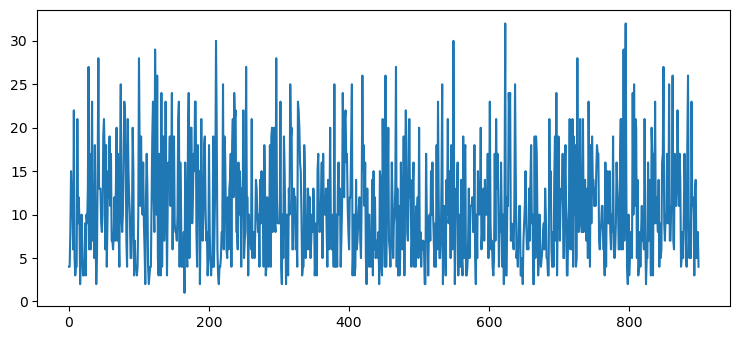

In [194]:
df['Totalwords'].plot() 

plt.show()

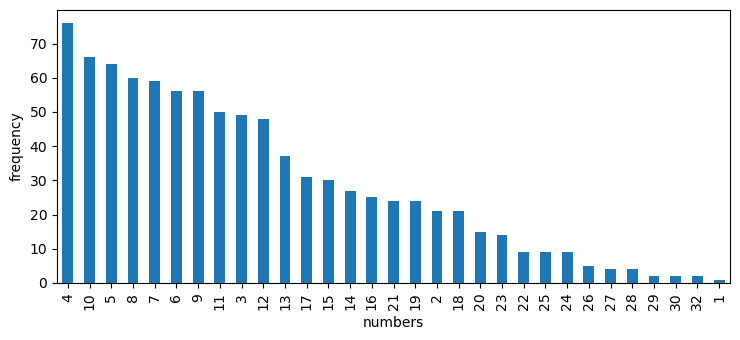

In [195]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
              
fig, ax = plt.subplots()
              
df['Totalwords'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')
plt.show()
                                     
                                     

<AxesSubplot:xlabel='Liked', ylabel='count'>

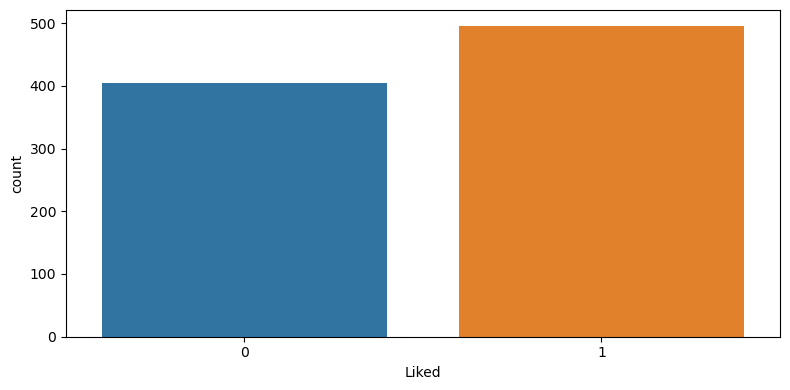

In [196]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=df, x='Liked', ax=ax)

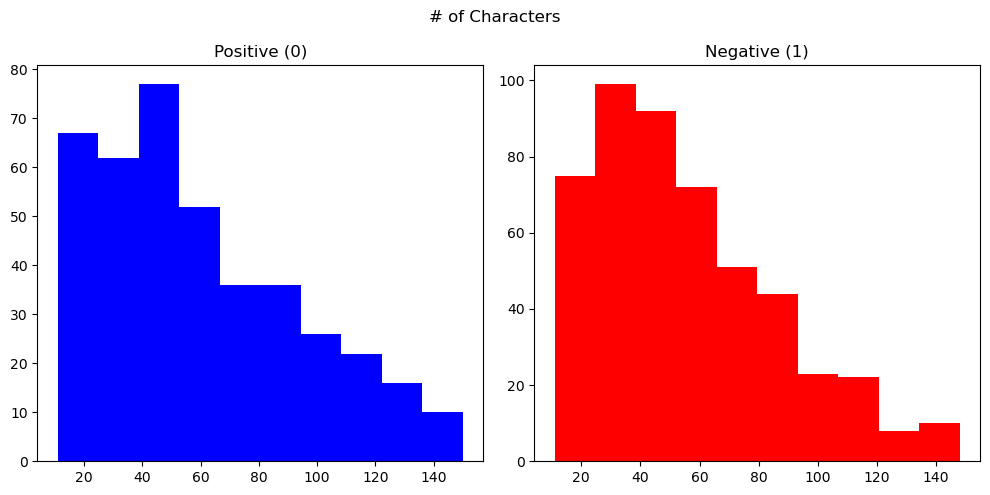

In [197]:
# Viewing the distribution of the number of characters in Tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
characters = df[df['Liked']==0]['Review'].str.len()
ax1.hist(characters,color='blue')
ax1.set_title('Positive (0)')
characters = df[df['Liked']==1]['Review'].str.len()
ax2.hist(characters,color='red')
ax2.set_title('Negative (1)')
fig.suptitle('# of Characters')
plt.show()

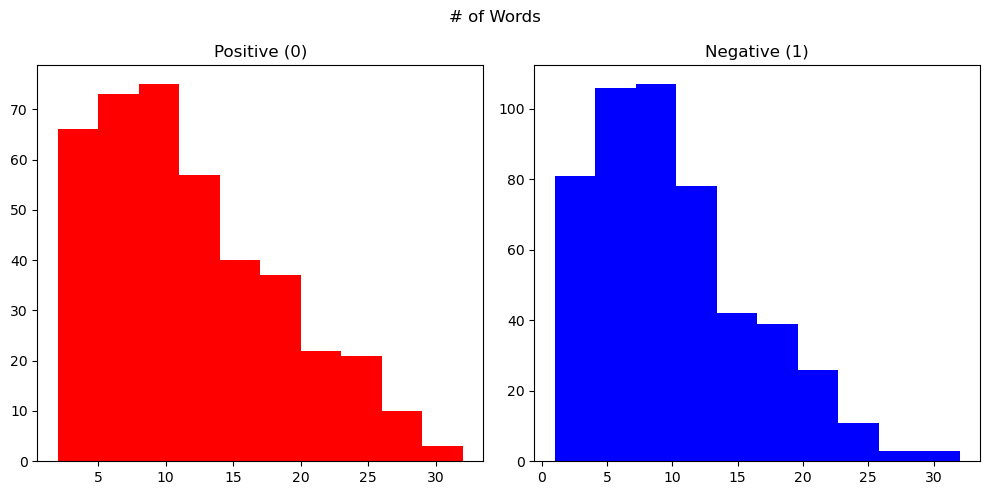

In [198]:
# Viewing the distribution of the number of words in Tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
words = df[df['Liked']==0]['Review'].str.split().map(lambda x: len(x))
ax1.hist(words,color='red')
ax1.set_title('Positive (0)')
words = df[df['Liked']==1]['Review'].str.split().map(lambda x: len(x))
ax2.hist(words,color='blue')
ax2.set_title('Negative (1)')
fig.suptitle('# of Words')
plt.show()

# Word cloud for negative review

In [199]:
from wordcloud import WordCloud

#defining funtion to plot wordcloud on any given corpous

def wordcloud_show(Review):
    text = " ".join(review for review in Review)

   # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

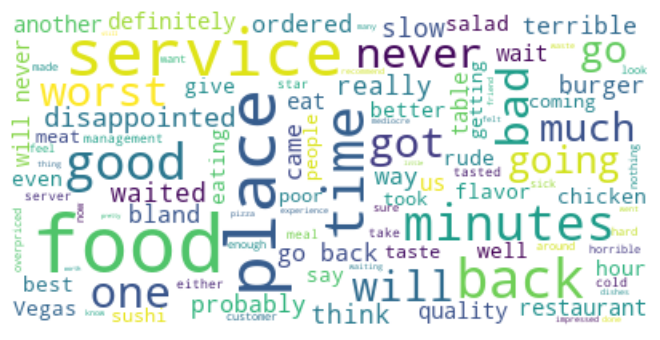

In [200]:
wordcloud_show(df.Review[df.Liked==0])

#  Word cloud for positive review

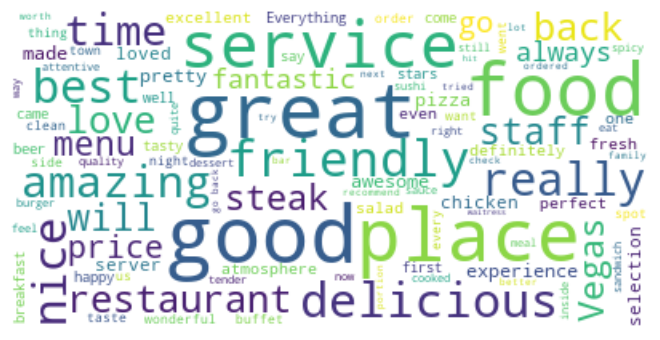

In [201]:
wordcloud_show(df.Review[df.Liked==1])


# Preprocessing Dataset

In [202]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#defining function to preprocess text

def preprocess(text):
    #replacing non-charcter with ' '
    review = re.sub('[^a-zA-Z]', ' ', text)
    #converting into lower case
    review = review.lower()
    #spliting string into text
    review = review.split()
    #removinf stop-words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    
    return review

In [203]:
#aplying funtion to pre-procees the Review column and savin into new column name "Processed"
df['Processed'] = df['Review'].apply(lambda x: preprocess(x))


In [204]:
#checking the above transformation
df['Processed']


0                                         wow love place
1                                             crust good
2                                     tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
895           want first say server great perfect servic
896                                    pizza select good
897                                  strawberri tea good
898                highli unprofession rude loyal patron
899                                  overal great experi
Name: Processed, Length: 900, dtype: object

In [205]:
df.head()

,Review,Liked,Totalwords,Processed
0,Wow... Loved this place.,1,4,wow love place
1,Crust is not good.,0,4,crust good
2,Not tasty and the texture was just nasty.,0,8,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,12,select menu great price


# Word cloud for  pre processed data

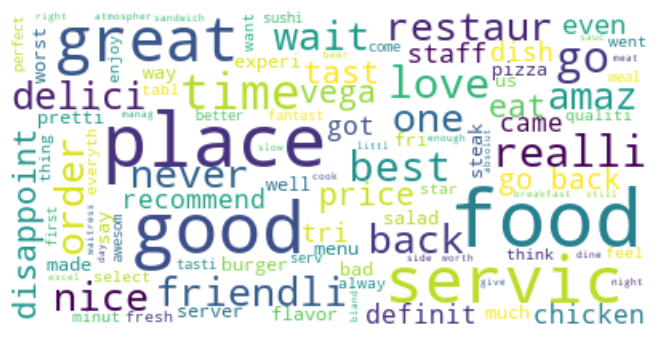

In [206]:
wordcloud_show(df.Processed)


# Word cloud for negative pre processed data

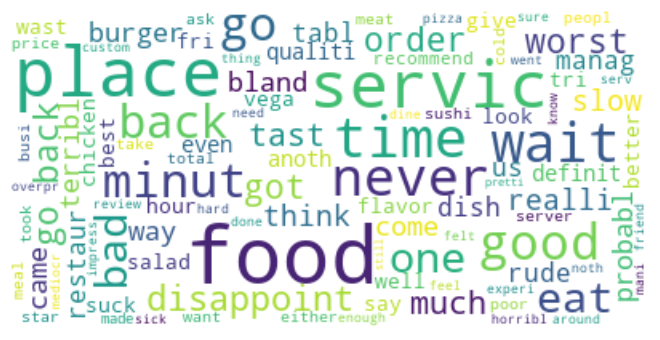

In [207]:
wordcloud_show(df.Processed[df.Liked==0])

# Word cloud for positive pre processed data

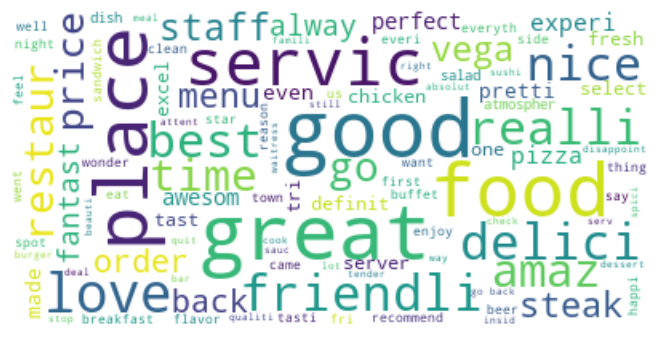

In [208]:
wordcloud_show(df.Processed[df.Liked==1])

# Vectorization

In [209]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [210]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Training and Classification

In [211]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Multinomial NB

In [212]:
# Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB(alpha=0.1)
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 89  35]
 [ 27 119]]


Accuracy is  77.04 %
Precision is  0.77
Recall is  0.82


# Bernoulli NB

In [213]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB(alpha=0.8)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 68  56]
 [ 21 125]]


Accuracy is  71.48 %
Precision is  0.69
Recall is  0.86


# Logistic Regression

In [214]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier3 = linear_model.LogisticRegression(C=1.5)
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 87  37]
 [ 30 116]]


Accuracy is  75.19 %
Precision is  0.76
Recall is  0.79
